<a href="https://colab.research.google.com/github/ghdakrk/ML/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 의사결정 나무를 이용해 붓꽃 데이터를 분류해보자
# 시각화를 위해 꽃의 길이와 폭만 독립변수로 사용
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    
    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z


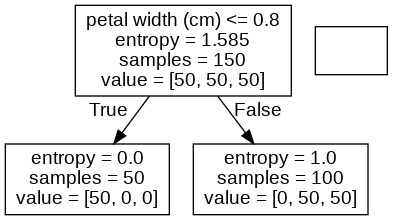

In [ ]:
draw_decision_tree(tree1)

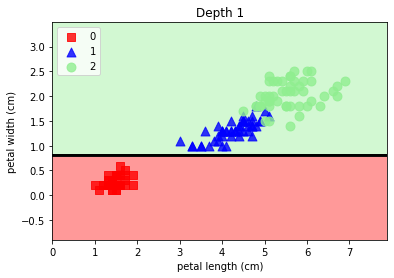

In [ ]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, tree1.predict(X))

tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

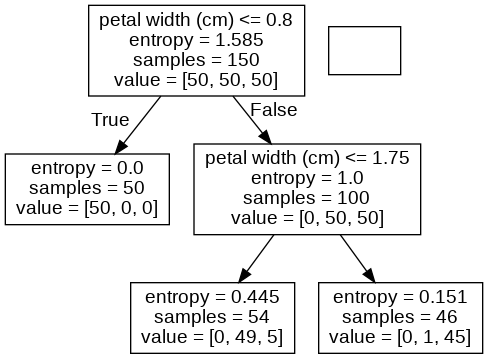

In [ ]:
draw_decision_tree(tree2)

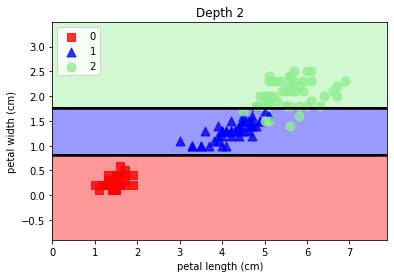

In [ ]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [ ]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

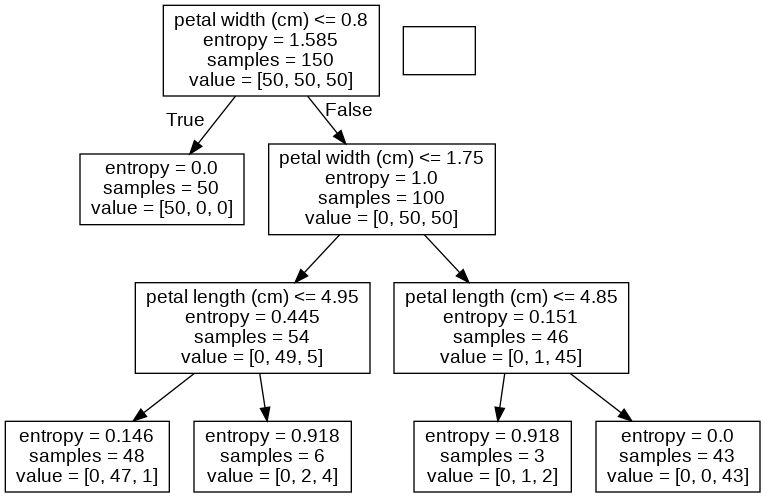

In [ ]:
draw_decision_tree(tree3)

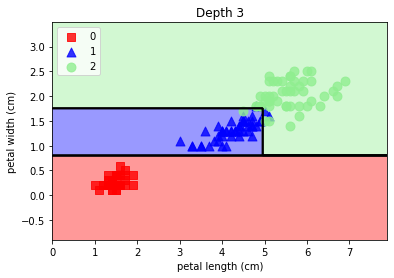

In [ ]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()


In [ ]:
confusion_matrix(y, tree3.predict(X))


In [ ]:
tree4 = DecisionTreeClassifier(
 criterion='entropy', max_depth=4, random_state=0).fit(X, y)

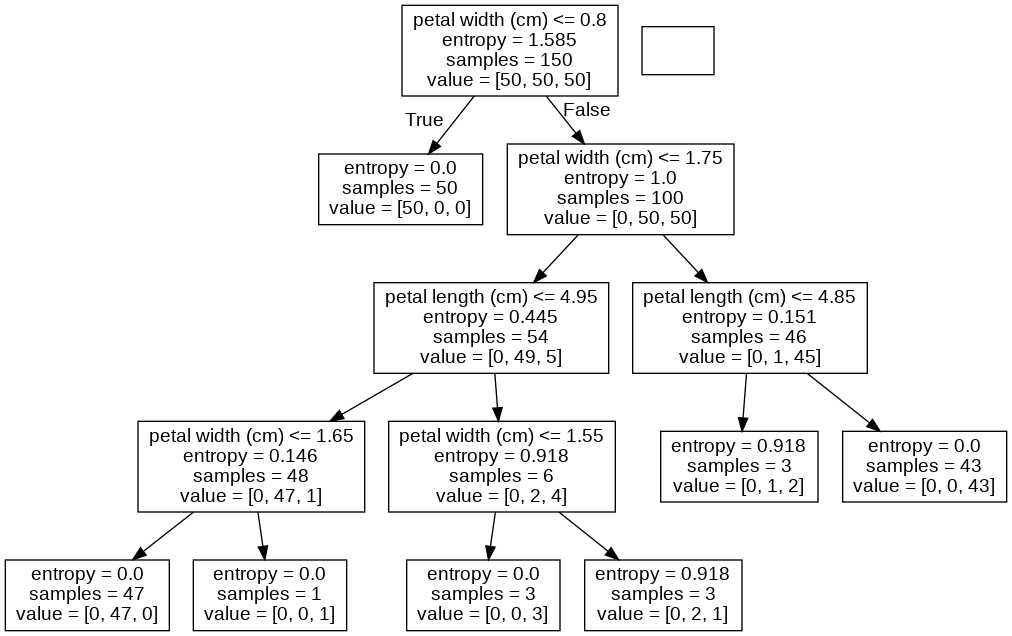

In [ ]:
draw_decision_tree(tree4)

In [ ]:
# 꽃받침으로 해보기
data = load_iris()
y = data.target
X = data.data[:, :2]
feature_names = data.feature_names[:2]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [ ]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

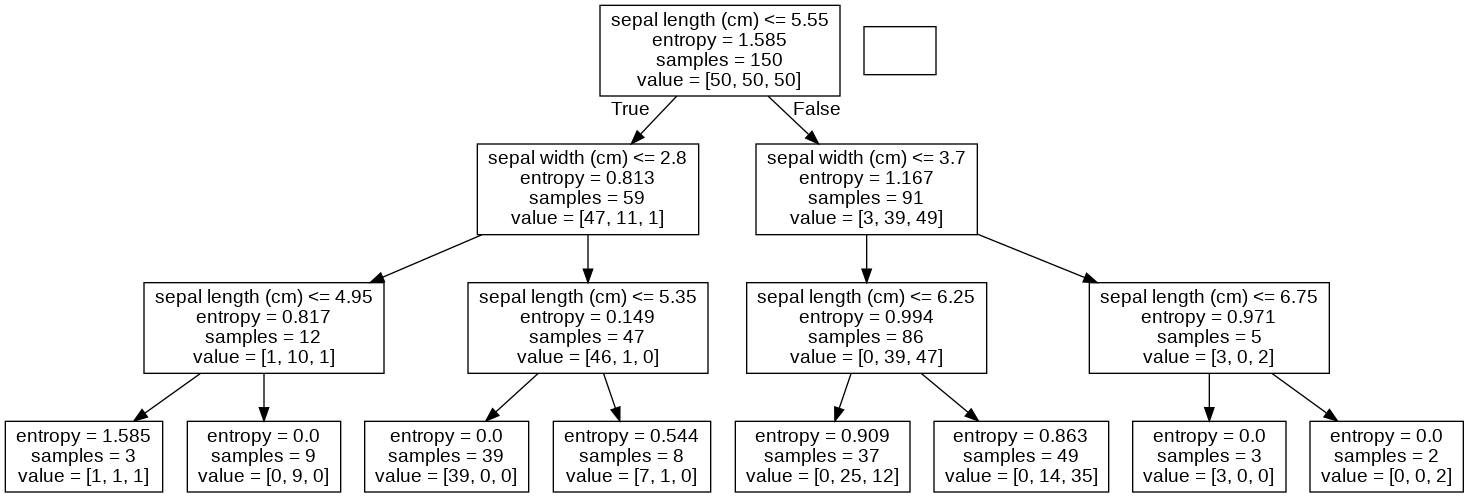

In [ ]:
draw_decision_tree(tree3)

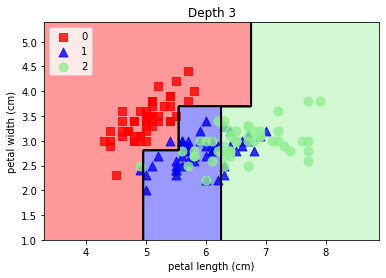

In [ ]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)
from sklearn.metrics import accuracy_score
accuracy_score(y1, y1_pred)

0.8133333333333334

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean()

0.7466666666666666

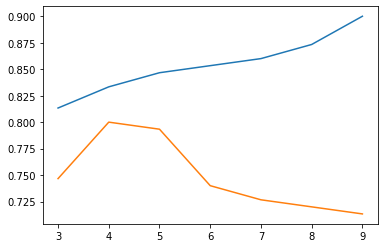

In [ ]:
mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean())

 
plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()
